In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# from sklearn.externals.six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
from matplotlib.legend_handler import HandlerLine2D
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Orginal Dataset

capstone = pd.read_csv('Dataset/HR_Employee_Attrition_Data.csv')

In [3]:
#Creating a copy for the dataset for working on the same without affecting the original dataset

df_cap = capstone

In [4]:
#Dropping the Serial column to determine the duplicates on the dataset

df_new=df_cap.drop(['EmployeeNumber'], axis = 1)

In [5]:
#New Dataset after dropping the column

df_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,...,3,80,1,17,3,3,5,2,0,3
2936,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,...,1,80,1,9,5,3,7,7,1,7
2937,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,...,2,80,1,6,0,3,6,2,0,3
2938,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,4,...,4,80,0,17,3,2,9,6,0,8


In [6]:
#Finding the duplitcate and creating a dataset for the duplicted files

duplicate = df_new[df_new.duplicated()]

In [7]:
duplicate

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1470,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1471,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
1472,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
1473,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
1474,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,...,3,80,1,17,3,3,5,2,0,3
2936,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,...,1,80,1,9,5,3,7,7,1,7
2937,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,...,2,80,1,6,0,3,6,2,0,3
2938,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,4,...,4,80,0,17,3,2,9,6,0,8


In [8]:
# Slicing a new Dataset which does not have any duplicate values

df_caps=df_new[:1470]

In [9]:
df_caps

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,4,...,4,80,0,17,3,2,9,6,0,8


In [10]:
print("The Number of employee who left the company :",len(df_caps[df_caps['Attrition']=='Yes']))
print("The Number of employee who didn't left the company:",len(df_caps[df_caps['Attrition']=='No']))
print("The proportion of employee who left:",(len(df_caps[df_caps['Attrition']=='Yes'])/len(df_caps)))

The Number of employee who left the company : 237
The Number of employee who didn't left the company: 1233
The proportion of employee who left: 0.16122448979591836


In [10]:
#Differentiating the categorical columns

categorical=['BusinessTravel','OverTime','Over18','MaritalStatus','Gender','EducationField','Department']

In [11]:
#Differentiating the numerical columns

numerical=['Age','DistanceFromHome','NumCompaniesWorked','PercentSalaryHike','YearsAtCompany','WorkLifeBalance','YearsInCurrentRole','YearsWithCurrManager','PerformanceRating','EnvironmentSatisfaction','YearsSinceLastPromotion']

'The below shows that there are outliers present on the dataset which need to be treated '

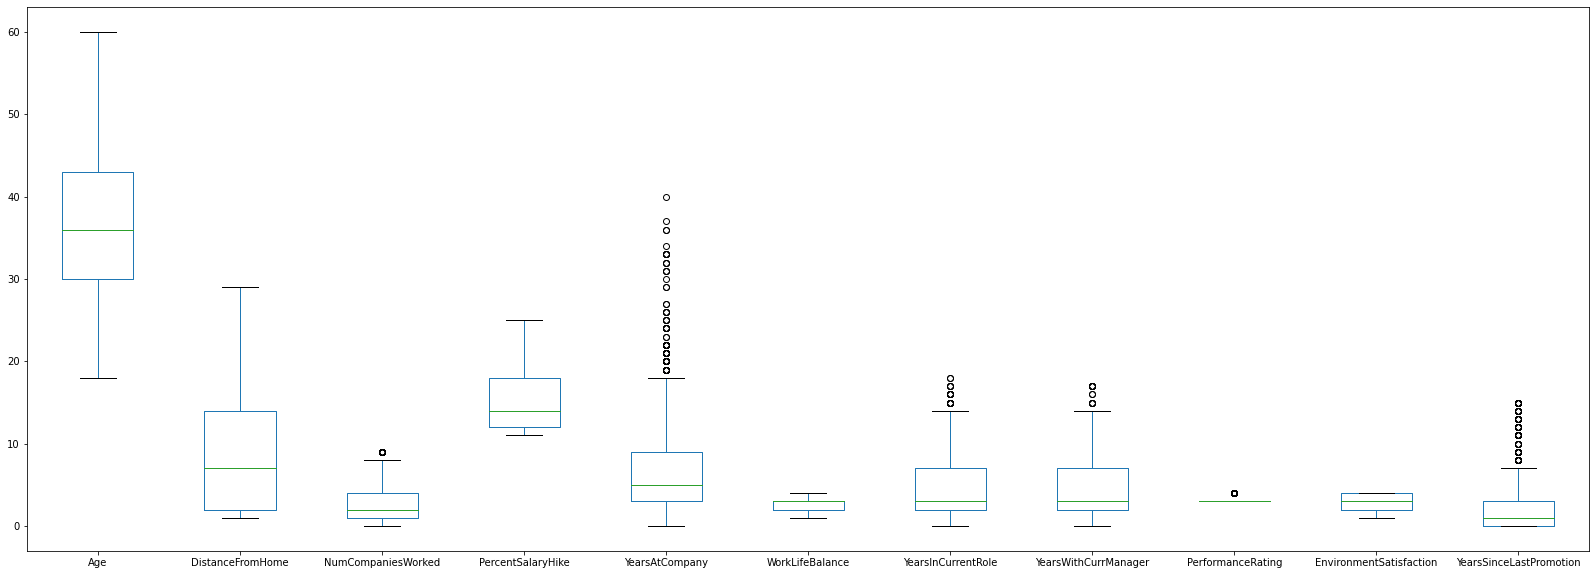

In [13]:
#Detecting the utliers on the numerical columns

df_caps[numerical].plot(kind='box', figsize=(28,10))
plt.show

"The below shows that there are outliers present on the dataset which need to be treated "

# Treating the outliers with IQR

In [12]:
sorted(df_caps[numerical])
Q1=df_caps[numerical].quantile(0.25)
Q3=df_caps[numerical].quantile(0.75)
IQR=Q3-Q1
print(IQR)

Age                        13.0
DistanceFromHome           12.0
NumCompaniesWorked          3.0
PercentSalaryHike           6.0
YearsAtCompany              6.0
WorkLifeBalance             1.0
YearsInCurrentRole          5.0
YearsWithCurrManager        5.0
PerformanceRating           0.0
EnvironmentSatisfaction     2.0
YearsSinceLastPromotion     3.0
dtype: float64


In [13]:
print(df_caps[numerical] < (Q1 - 1.5 * IQR)) |(df_caps[numerical] > (Q3 + 1.5 * IQR))

        Age  DistanceFromHome  NumCompaniesWorked  PercentSalaryHike  \
0     False             False               False              False   
1     False             False               False              False   
2     False             False               False              False   
3     False             False               False              False   
4     False             False               False              False   
...     ...               ...                 ...                ...   
1465  False             False               False              False   
1466  False             False               False              False   
1467  False             False               False              False   
1468  False             False               False              False   
1469  False             False               False              False   

      YearsAtCompany  WorkLifeBalance  YearsInCurrentRole  \
0              False            False               False   
1            

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [14]:
num= df_caps[numerical]

In [15]:
num_cleared_iqr = num[~((num < (Q1 - 1.5 * IQR)) |(num > (Q3 + 1.5 * IQR))).any(axis=1)]
num_cleared_iqr

,Age,DistanceFromHome,NumCompaniesWorked,PercentSalaryHike,YearsAtCompany,WorkLifeBalance,YearsInCurrentRole,YearsWithCurrManager,PerformanceRating,EnvironmentSatisfaction,YearsSinceLastPromotion
0,41,1,8,11,6,1,4,5,3,2,0
2,37,2,6,15,0,3,0,0,3,4,0
3,33,3,1,11,8,3,7,0,3,4,3
5,32,2,0,13,7,2,7,6,3,4,3
9,36,27,6,13,7,2,7,7,3,3,7
...,...,...,...,...,...,...,...,...,...,...,...
1464,26,5,0,18,4,3,2,0,3,4,0
1465,36,23,4,17,5,3,2,3,3,3,0
1466,39,6,4,15,7,3,7,7,3,4,1
1468,49,2,2,14,9,2,6,8,3,4,0


In [16]:
df_caps[numerical]=num_cleared_iqr

In [17]:
"27% of the values were outliers which has been treated and replaced with NaN so we need to replace the null the null values"

'27% of the values were outliers which has been treated and replaced with NaN so we need to replace the null the null values'

In [18]:
df_caps[numerical].isnull().sum()

Age                        408
DistanceFromHome           408
NumCompaniesWorked         408
PercentSalaryHike          408
YearsAtCompany             408
WorkLifeBalance            408
YearsInCurrentRole         408
YearsWithCurrManager       408
PerformanceRating          408
EnvironmentSatisfaction    408
YearsSinceLastPromotion    408
dtype: int64

# Treatment of missing values with KNN

In [19]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

In [20]:
num_filled = imputer.fit_transform(num)

In [21]:
df_caps[numerical]=num_filled
df_caps

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,2.0,...,1,80,0,8,0,1.0,6.0,4.0,0.0,5.0
1,49.0,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,3.0,...,4,80,1,10,3,3.0,10.0,7.0,1.0,7.0
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4.0,...,2,80,0,7,3,3.0,0.0,0.0,0.0,0.0
3,33.0,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,1,4.0,...,3,80,0,8,3,3.0,8.0,7.0,3.0,0.0
4,27.0,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,1.0,...,4,80,1,6,3,3.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,No,Travel_Frequently,884,Research & Development,23.0,2,Medical,1,3.0,...,3,80,1,17,3,3.0,5.0,2.0,0.0,3.0
1466,39.0,No,Travel_Rarely,613,Research & Development,6.0,1,Medical,1,4.0,...,1,80,1,9,5,3.0,7.0,7.0,1.0,7.0
1467,27.0,No,Travel_Rarely,155,Research & Development,4.0,3,Life Sciences,1,2.0,...,2,80,1,6,0,3.0,6.0,2.0,0.0,3.0
1468,49.0,No,Travel_Frequently,1023,Sales,2.0,3,Medical,1,4.0,...,4,80,0,17,3,2.0,9.0,6.0,0.0,8.0


'There is a noticable hike after the completion of 20 years in the company for an eployee'

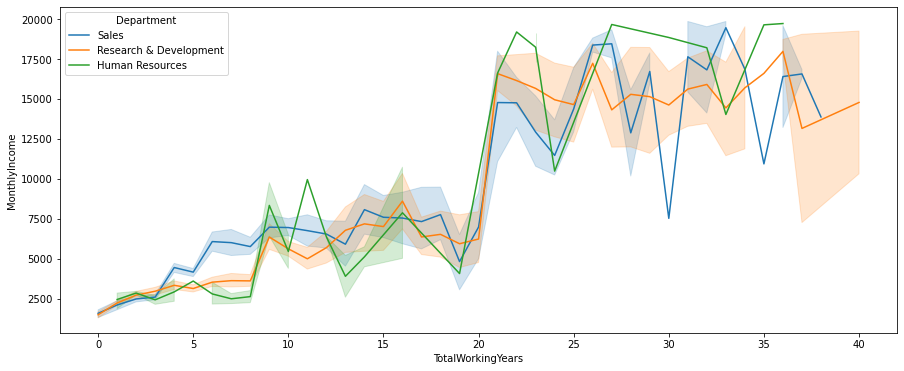

In [22]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df_caps, x="TotalWorkingYears", y="MonthlyIncome", hue = 'Department')
plt.show
# Analysis
"There is a noticable hike after the completion of 20 years in the company for an eployee"

'Higher number of male employees are on the lower salary structure as compared to female employees.'

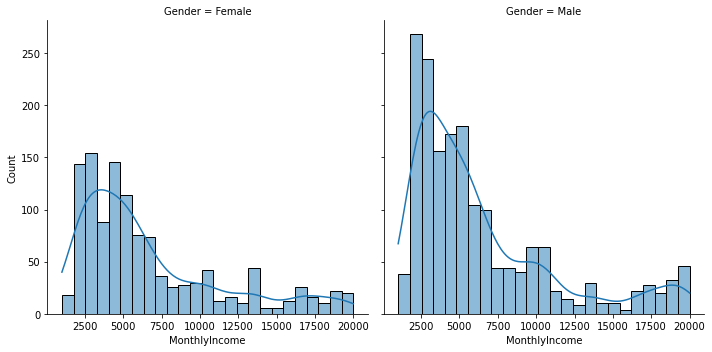

In [23]:
#comparing if the salary is gender biased

sns.displot(data=df_cap, x="MonthlyIncome", col="Gender", kde=True)

"Higher number of male employees are on the lower salary structure as compared to female employees."

'Hence, shared that the performance is usually higer for the male employees.'

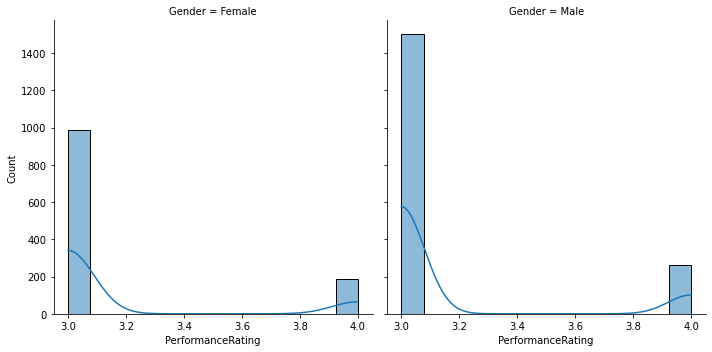

In [44]:
#checking if the performance was affected by gender

sns.displot(data=df_cap, x="PerformanceRating", col="Gender", kde=True)

"Hence, shared that the performance is usually higer for the male employees."

## Analysis of the Categorical Variable

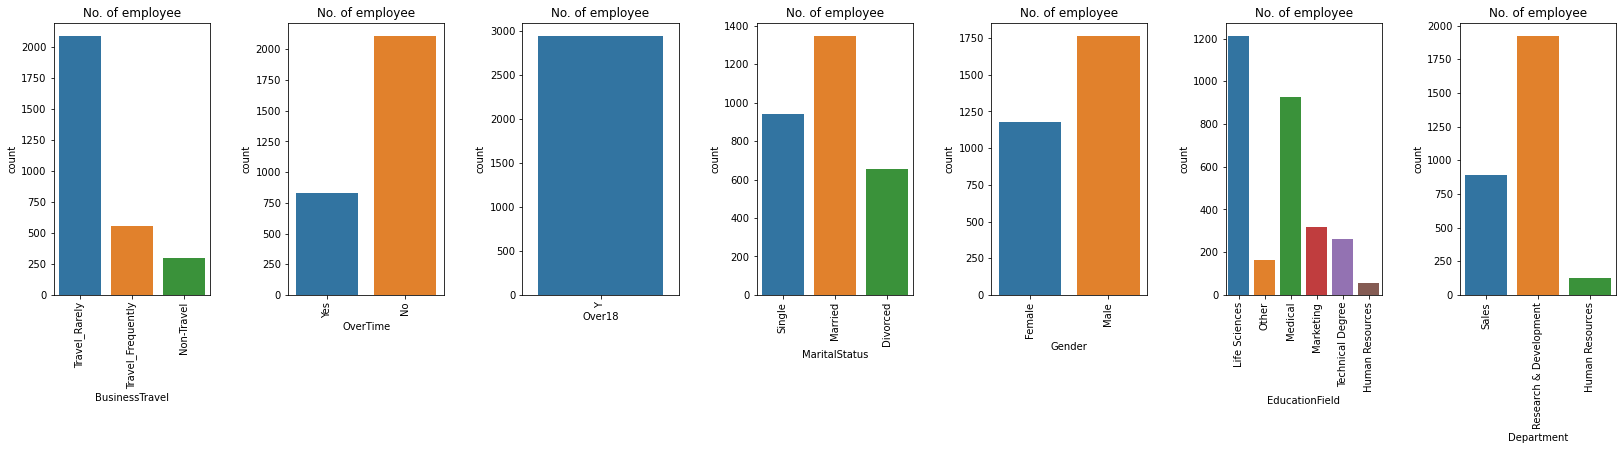

In [102]:
# here we will do it only for categorical variable
import itertools
categorical=['BusinessTravel','OverTime','Over18','MaritalStatus','Gender','EducationField','Department']
fig=plt.subplots(figsize=(28,5))
length=len(categorical)
# itertools.zip_longest for to execute the longest loop
for i,j in itertools.zip_longest(categorical,range(length)):
    plt.subplot(1,length,j+1)
    plt.subplots_adjust(wspace=.5)
    sns.countplot(x=i,data = df_cap)
    plt.xticks(rotation =90)
    plt.title("No. of employee")

### Observations on the basis of above Analysis:-
1. Almost 2000 Employees who Travel Rarely. Around 500 Employees travel Frequently.
2. Around 800 Employees opt for Overtime in the company.
3. All the Employees are over the age of 18.
4. Around 20% Employees are married.
5. The Male Employee proportion is more than Female.
6. A major portion of Employees have a background from either Life Sciencs or Medical.
7. R&D Dept has maximum Number of Employees followed by Sales.


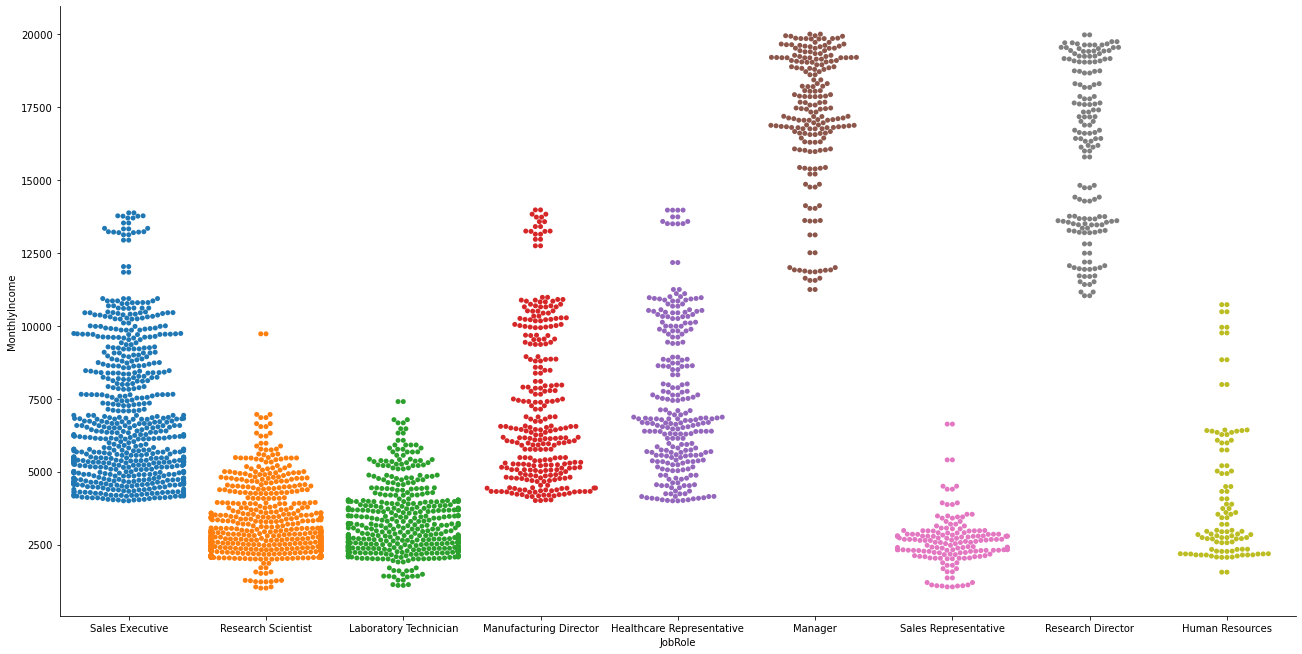

In [24]:
#Analysing the Salary scale for different JobRoles

sns.catplot(data = df_cap, x = 'JobRole', y = 'MonthlyIncome',kind = 'swarm', aspect = 2, height = 9)

### Analysis for the above:-
1. The highest paid employees are Managers and Research Directors.
2. The second highest paid Job Role are Sales Executive, Manufacturing Director & Healthcare Representive.

'The employees get almost a stagnant hike for the first10 years they with the company however the hike is better around 23 years with the company.'

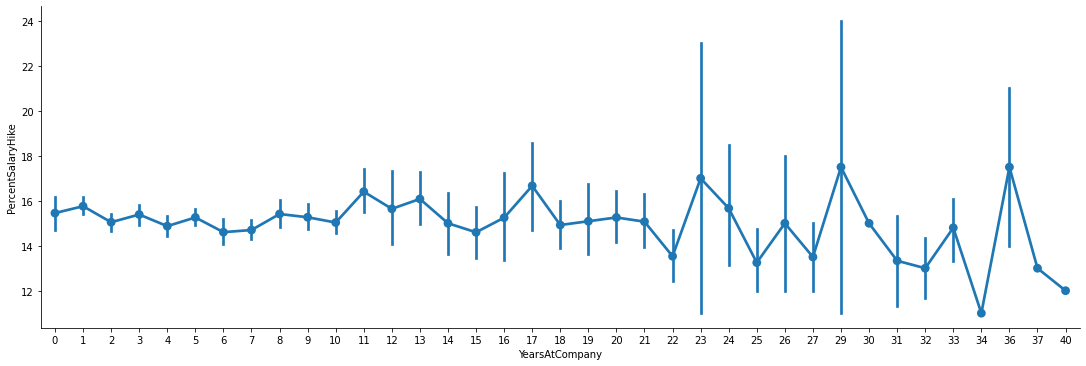

In [47]:
#Analysis of Salary hike with Loyalty

sns.catplot(data = df_cap, y = 'PercentSalaryHike', x = 'YearsAtCompany', aspect =3, kind = 'point')

"The employees get almost a stagnant hike for the first10 years they with the company however the hike is better around 23 years with the company."

'Hence the below diagram shows that the Overtime is not affecting the Jobsaticfaction level of Employees'

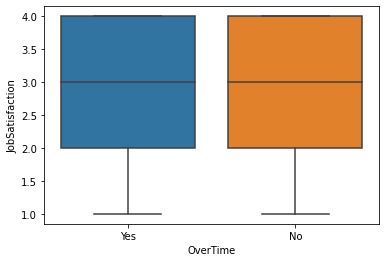

In [48]:
#Analysis of effest of Overtime on JobSatisfaction

sns.boxplot(data = df_cap, x = 'OverTime', y = 'JobSatisfaction')

"Hence the below diagram shows that the Overtime is not affecting the Jobsaticfaction level of Employees"

We can motivate the employees for more training as it has a significant effect to their salary hikes.At least 2-3 tRainings will lead to a good hike


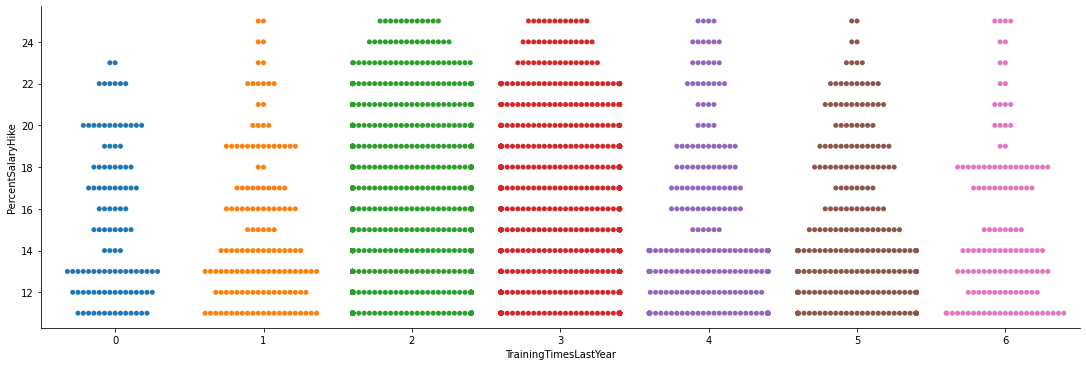

In [49]:
# Analysis if the Training helps the employees for better salary

sns.catplot(data = df_cap, x = 'TrainingTimesLastYear', y = 'PercentSalaryHike', kind = 'swarm', aspect = 3)

print("We can motivate the employees for more training as it has a significant effect to their salary hikes."
"At least 2-3 tRainings will lead to a good hike")

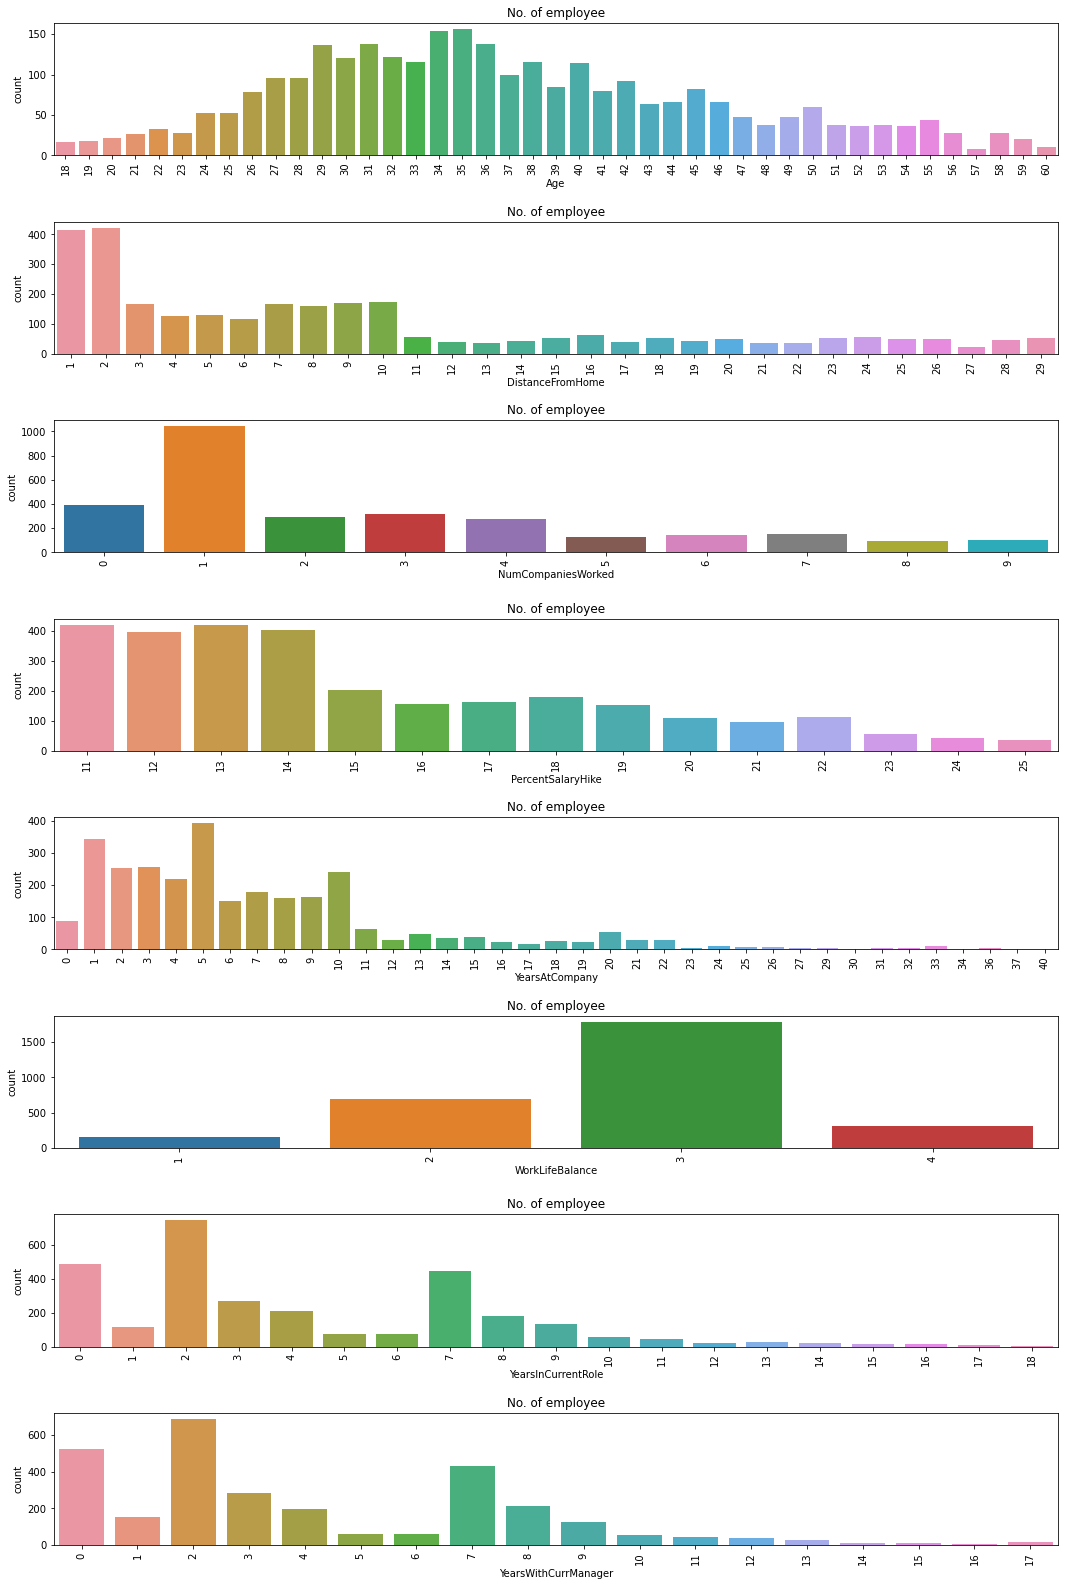

In [96]:
numerical=['Age','DistanceFromHome','NumCompaniesWorked','PercentSalaryHike','YearsAtCompany','WorkLifeBalance','YearsInCurrentRole','YearsWithCurrManager']
fig=plt.subplots(figsize=(18,28))
length=len(numerical)
# itertools.zip_longest for to execute the longest loop
for i,j in itertools.zip_longest(numerical,range(length)):
    plt.subplot(np.ceil(length),1,j+1)
    plt.subplots_adjust(hspace=.5)
    sns.countplot(x=i,data = df_cap)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

### Analysis on the above diagrams ::-
1. Almost 60% Employees are within the range of Age -> 28-38
2. Employees tend to stay with 10 KM Radius of the office location.
3. We prefer to hire candidates with atleast 1 year of experience.
4. The Salary hike of the company usually varies between 11 - 14 percent.
5. We have almost 67% Employees who have stayed in the company for 10 Years. We can approach on some inititatives to get more longibility.
6. Around 70% employees have a good work life balance. However we can definitely work on the rest 30% to give the employees more reason to stay in the company.
7. Employees usually stay 2 years in a current job role and then tend to move forward to a better oppurtunity within the compnay.

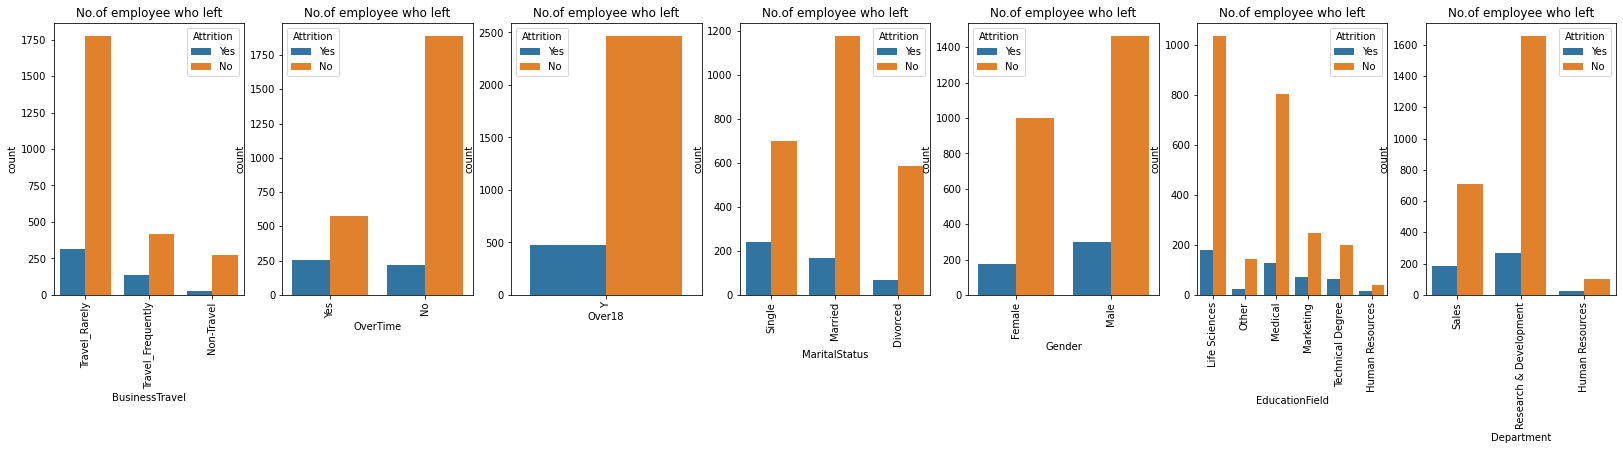

In [104]:
#Analysing the Attrition with Categorical Features


fig=plt.subplots(figsize=(28,5))# to define the size of figure
length=len(categorical) # no of categorical and ordinal variable
for i,j in itertools.zip_longest(categorical,range(length)): # itertools.zip_longest for to execute the longest loop
    plt.subplot(1,length,j+1) # this is to plot the subplots like as 2,2,1 it means 2x2 matrix and graph at 1 
    plt.subplots_adjust(hspace=1.2) # to adjust the distance between subplots
    sns.countplot(x=i,data = df_cap,hue="Attrition") # To plot the countplot of variable with hue left
    plt.xticks(rotation=90) # to rotate the xticks by 90 such that no xtixks overlap each other
    plt.title("No.of employee who left") # to plot the title of graph

### Obervation on the Attrition Rate based on Ctegorical Feature :-
1. Male Employees are more prone to leave than Female Employees.
2. The R&D Department is facing a higher attrition rate although keeping the highest number of employees in the company.
3. Employees coming with Background of Life Science and Medical are leaving the company either for a better oppurtunity or scope.
4. Bachelor Employees are more keen for better oppurtunities which led to a higher attrition rate.

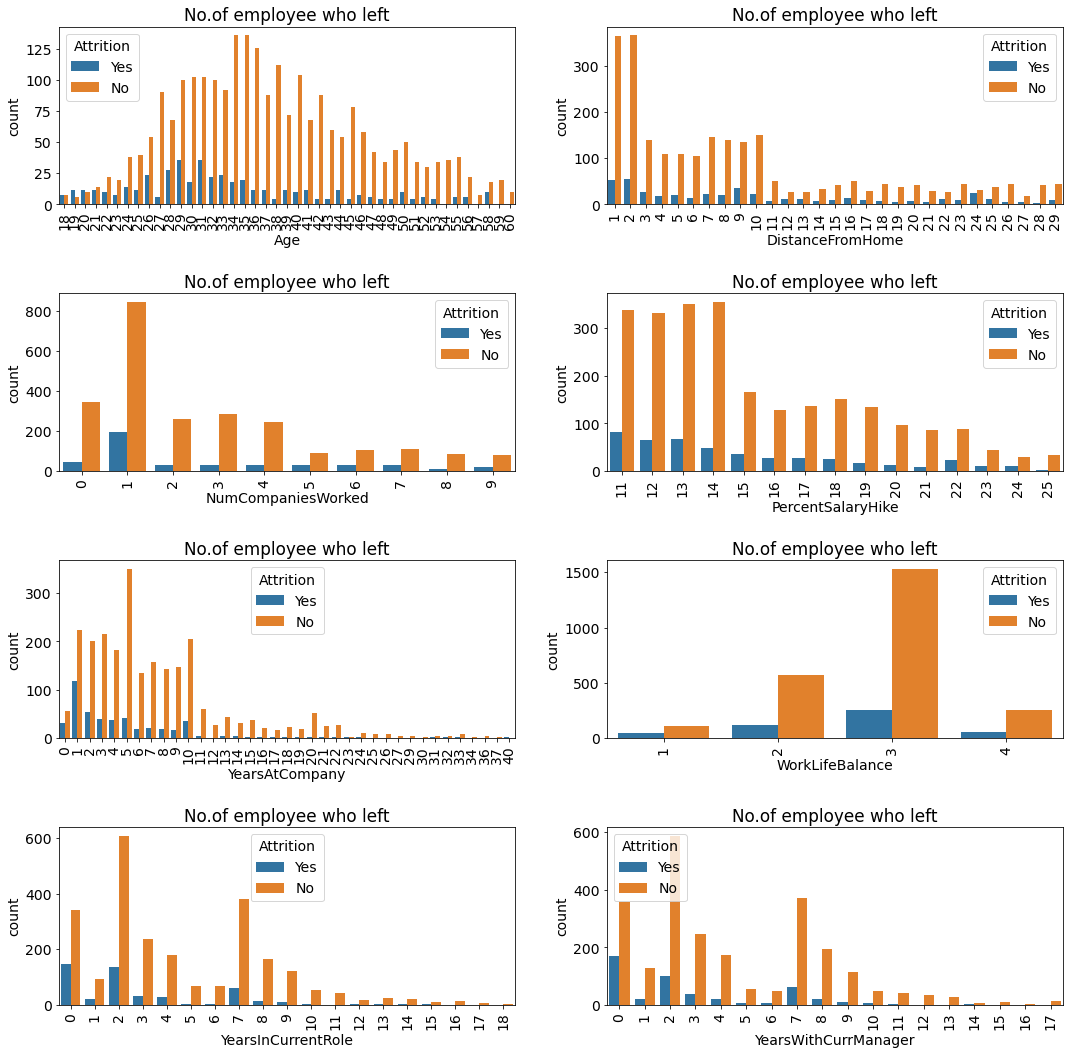

In [196]:
#Analysing the Attrition with Numerical Features

numerical=['Age','DistanceFromHome','NumCompaniesWorked','PercentSalaryHike','YearsAtCompany','WorkLifeBalance','YearsInCurrentRole','YearsWithCurrManager']

fig=plt.subplots(figsize=(18,18))# to define the size of figure
length=len(numerical) # no of categorical and ordinal variable
for i,j in itertools.zip_longest(numerical,range(length)): # itertools.zip_longest for to execute the longest loop
    plt.subplot(np.ceil(length/2),2,j+1) # this is to plot the subplots like as 2,2,1 it means 2x2 matrix and graph at 1 
    plt.subplots_adjust(hspace=.5) # to adjust the distance between subplots
    sns.countplot(x=i,data = df_cap,hue="Attrition") # To plot the countplot of variable with hue left
    plt.xticks(rotation=90) # to rotate the xticks by 90 such that no xtixks overlap each other
    plt.title("No.of employee who left") # to plot the title of graph

### Observations:-
1. There is high attrition rate for employees not receiving a promotion for 7 years
2. Lower Environment is also a leading cause for higher attrition.

## Random Forest Algorithm for dataset Analysis and prediction

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [26]:
#Encoding the categorical data

def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    res_df['Over18'] = le.fit_transform(res_df['Over18'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    
    return res_df

In [27]:
df_caps

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,2.0,...,1,80,0,8,0,1.0,6.0,4.0,0.0,5.0
1,49.0,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,3.0,...,4,80,1,10,3,3.0,10.0,7.0,1.0,7.0
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4.0,...,2,80,0,7,3,3.0,0.0,0.0,0.0,0.0
3,33.0,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,1,4.0,...,3,80,0,8,3,3.0,8.0,7.0,3.0,0.0
4,27.0,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,1.0,...,4,80,1,6,3,3.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,No,Travel_Frequently,884,Research & Development,23.0,2,Medical,1,3.0,...,3,80,1,17,3,3.0,5.0,2.0,0.0,3.0
1466,39.0,No,Travel_Rarely,613,Research & Development,6.0,1,Medical,1,4.0,...,1,80,1,9,5,3.0,7.0,7.0,1.0,7.0
1467,27.0,No,Travel_Rarely,155,Research & Development,4.0,3,Life Sciences,1,2.0,...,2,80,1,6,0,3.0,6.0,2.0,0.0,3.0
1468,49.0,No,Travel_Frequently,1023,Sales,2.0,3,Medical,1,4.0,...,4,80,0,17,3,2.0,9.0,6.0,0.0,8.0


In [28]:
#Splitting the dataset

enc_df_cap = preprocessor(df_caps)

X = enc_df_cap.iloc[:, df_caps.columns != 'Attrition']
Y = enc_df_cap.iloc[:, df_caps.columns == 'Attrition']

In [29]:
#sorting the Training and Testing Dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12)

In [30]:
#Standard Scaling of the training data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [31]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold


In [32]:
#fittinh og the dataset

rf= RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [33]:
rf.feature_importances_

array([0.06841612, 0.0116291 , 0.06710375, 0.005845  , 0.05462439,
       0.01326465, 0.02037377, 0.        , 0.02882329, 0.00794315,
       0.04800069, 0.02512672, 0.0081449 , 0.04293351, 0.02201732,
       0.01750805, 0.09642733, 0.05427523, 0.0323899 , 0.        ,
       0.06798303, 0.03305002, 0.0021861 , 0.02076581, 0.        ,
       0.0270192 , 0.07448816, 0.02604078, 0.0292147 , 0.03573438,
       0.01472304, 0.02360094, 0.02034697])

In [34]:
plt.rcParams.update({'figure.figsize': (12.0,8.0)})
plt.rcParams.update({'font.size':14})

<BarContainer object of 33 artists>

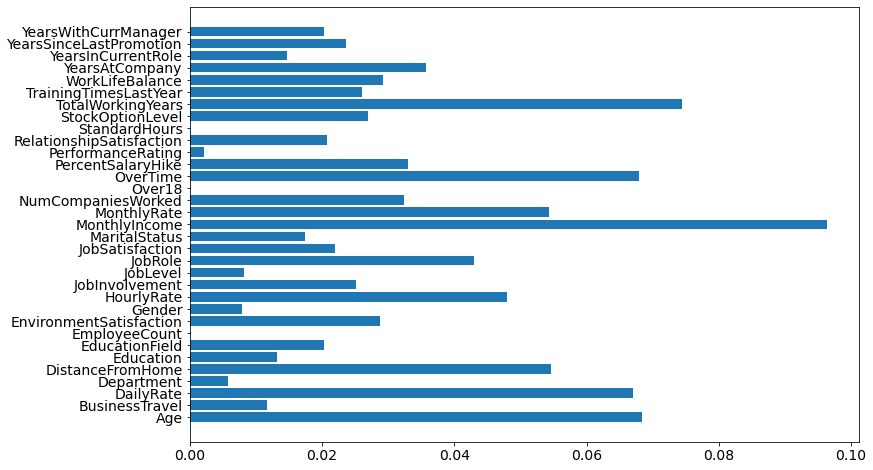

In [35]:
#Graphical presentation of the feature importance

plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'RandomForest Feature Importance')

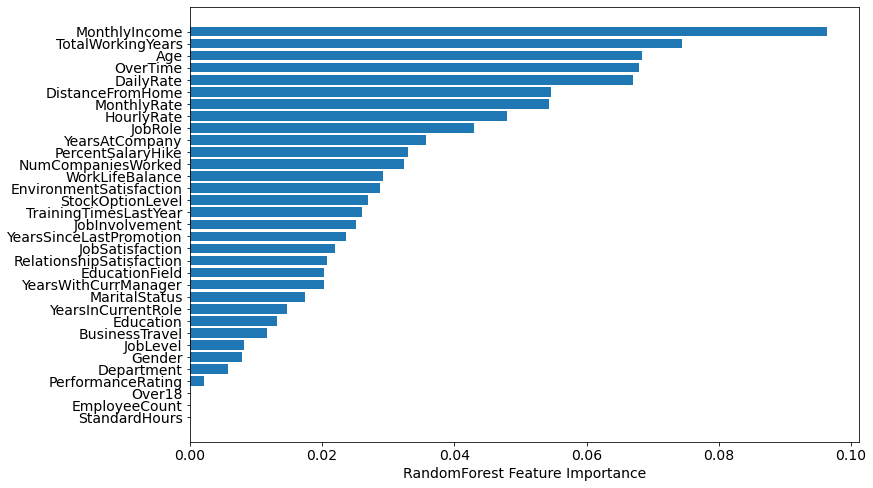

In [36]:
#Sorting the Variables on the basis of importance

sorted_idx= rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("RandomForest Feature Importance")

In [37]:
#Dropping the less important features to get a better result

df_caps.drop(['StandardHours','EmployeeCount','Over18','PerformanceRating','Gender','JobLevel','Department'],axis=1,inplace=True)

In [38]:
#Dividing the Variables

X1 = enc_df_cap.iloc[:, enc_df_cap.columns != 'Attrition']
Y1 = enc_df_cap.iloc[:, enc_df_cap.columns == 'Attrition']

In [39]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=12)

In [40]:
#Fitting the Dataset

fit_rf = RandomForestClassifier(random_state=42)

In [41]:
#Achieving the best Parameters
from sklearn.model_selection import GridSearchCV

import time


np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X1_train, Y1_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None}
Time taken in grid search:  112.20


In [42]:
# Set best parameters given by grid search 

fit_rf.set_params(criterion = 'gini',
                  max_features = None, 
                  max_depth = 6)

RandomForestClassifier(max_depth=6, max_features=None, random_state=42)

In [43]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from inspect import signature

In [52]:
probs = fit_rf.predict_proba(X1_test)

In [53]:
Y1_pred = fit_rf.predict(X1_test)
print("The Precision score is :" , precision_score(Y1_test, Y1_pred))


The Precision score is : 0.7647058823529411


In [54]:
print("The Recall Score is :" , recall_score(Y1_test, Y1_pred))

The Recall Score is : 0.2708333333333333


In [55]:
print("The F1 score is:", f1_score(Y1_test, Y1_pred))

The F1 score is: 0.39999999999999997


## Area under the Curve

In [55]:
att_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(Y1_test, att_probs)
roc_auc = auc(fpr, tpr)

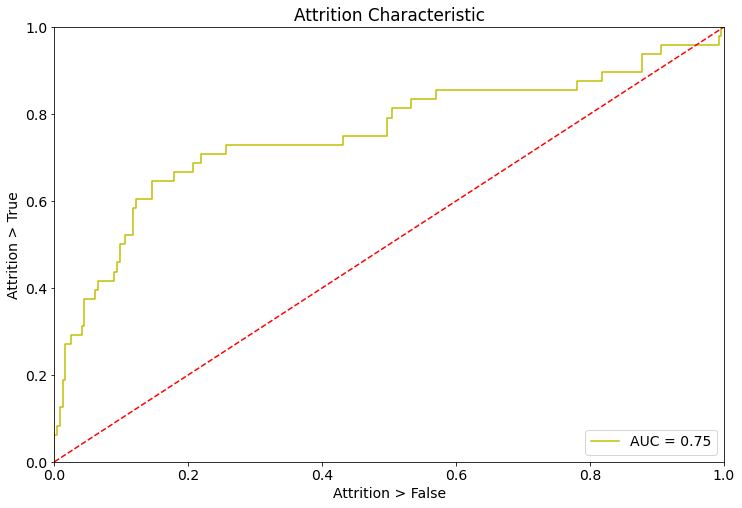

In [56]:
plt.title('Attrition Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Attrition > True')
plt.xlabel('Attrition > False')
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

## Precision Recall Curve

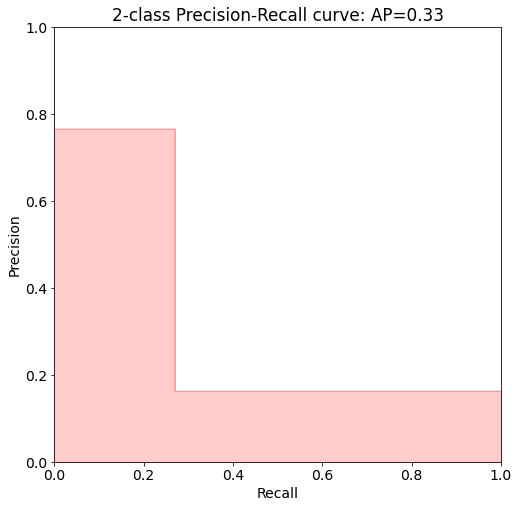

In [57]:
precision, recall, threshold = precision_recall_curve(Y1_test, Y1_pred)
average_precision = average_precision_score(Y1_test, Y1_pred)
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

## Accuracy Score of Random Forest Algorithm

In [49]:
rf= RandomForestRegressor()
fit_rf.fit(X1_train, Y1_train)

RandomForestClassifier(max_depth=6, max_features=None, random_state=42)

In [50]:
print('Accuracy Score of Training Set: ', fit_rf.score(X1_train, Y1_train))

Accuracy Score of Training Set:  0.9217687074829932


In [51]:
print('Accuracy Score of Testing set: ', fit_rf.score(X1_test, Y1_test))

Accuracy Score of Testing set:  0.8673469387755102


## Confusion Matrix Graph

In [56]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

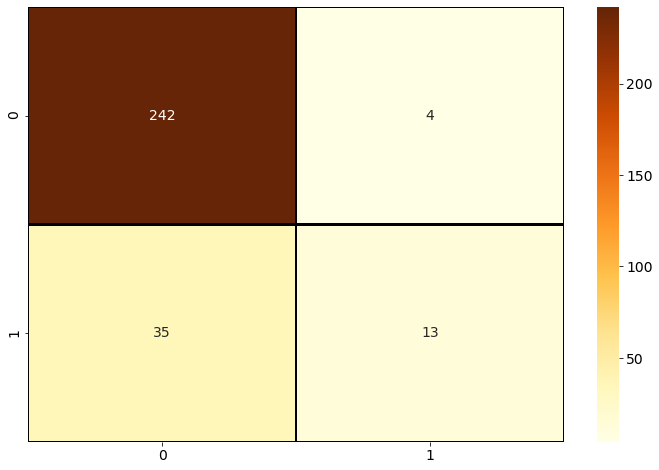

In [57]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(Y1_test, Y1_pred)


# Visualize it as a heatmap

sns.heatmap(data = CM, annot = True,fmt = 'd', linewidths=1.5, cmap="YlOrBr", linecolor='black',)
plt.show()

## OOB Rate

In [58]:
fit_rf.set_params(warm_start=False, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X1_train, Y1_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [59]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

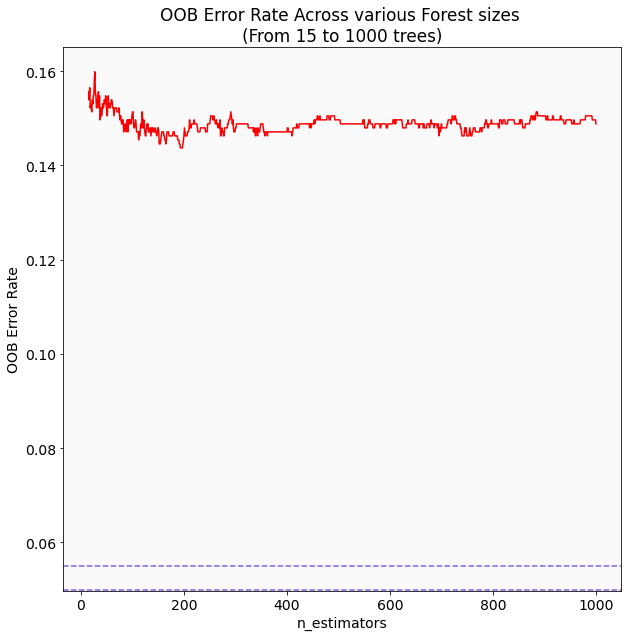

In [60]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.055, color='#875FDB',linestyle='--')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [40]:
from sklearn.svm import SVC
svm_model= SVC()

In [41]:
#tuning the parameters to get the best parameter for SVM

tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']}

In [42]:
#Applying the hypertuned parameters on SVM to get better result

from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [ ]:
#Fetching the accuracy score on the basis of the model

model_svm.fit(X1_train, Y1_train)
print(model_svm.best_score_)

In [ ]:
#Getting the best parameters to set

print(model_svm.best_params_)

In [ ]:
#Checkimmg the accuracy score with the best parameters in SVM

from sklearn import metrics

svc=SVC(C= 0.9, degree = 3, gamma = 0.05, kernel= 'poly')
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(Y_test,Y_pred))